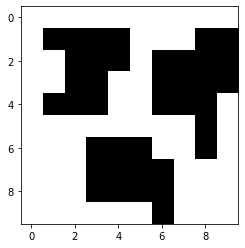

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(
    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [0, 0, 1, 1, 1, 0, 1, 1, 1, 1], 
    [0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
    [0, 1, 1, 1, 0, 0, 1, 1, 1, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 1, 0], 
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]
)
plt.imshow(data, cmap='binary')
plt.show()

The island 1
The size of this island is 12


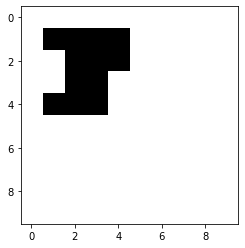

The island 2
The size of this island is 15


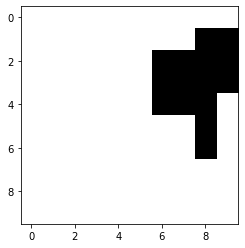

The island 3
The size of this island is 12


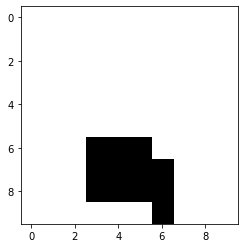

Total number of islands is 3


In [2]:
b=[]
n=len(data)
count=0
island=0
size=0
new_data=data.copy()
block=[]
block.append(np.zeros((n,n)))
#所有1的位置
for i in range(n):
    for j in range(n):
        if data[i,j]==1:
            b.append([j,i])
# 判斷
for c in b:
    #buffer歸零
    buffer=[0]
    
    #如果checked(2),就跳迴圈
    if data[c[1],c[0]]==2:
        continue
    
    #計算island數量
    print("========================================")
    island+=1
    size=0
    print("The island",island)
    
    #初步尋找矩陣值不為零的座標
    if c[0]+1!=n: #邊界條件
        if data[c[1],c[0]+1]==1: # x+1 位置判斷(往右一格)
            data[c[1],c[0]+1]=3
            buffer.append([c[0]+1,c[1]])
            count+=1
    if c[0]-1!=-1:
        if data[c[1],c[0]-1]==1: # x-1 位置判斷(往左一格)
            data[c[1],c[0]-1]=3
            buffer.append([c[0]-1,c[1]])
            count+=1
    if c[1]+1!=n:
        if data[c[1]+1,c[0]]==1: # y+1 位置判斷(往下一格)
            data[c[1]+1,c[0]]=3
            buffer.append([c[0],c[1]+1])
            count+=1
    if c[1]-1!=-1:
        if data[c[1]-1,c[0]]==1: # y-1 位置判斷(往上一格)
            data[c[1]-1,c[0]]=3
            buffer.append([c[0],c[1]-1])
            count+=1
    
    #將第一個不為零的矩陣位置改為checked並印出
    data[c[1],c[0]]=2
    size+=1
        
    #增加buffer格數並印出buffer
    for l in range(count,n+5):
        buffer.append([0,0])

    #buffer功能
    while buffer[count]!=0:
        size+=1
        #偵測到1的數量
        add=0
        if buffer[count][0]+1!=n: #邊界條件
            if data[buffer[count][1],buffer[count][0]+1]==1: # x+1 位置判斷(往右一格)
                data[buffer[count][1],buffer[count][0]+1]=3 #將值命為pulled(3)
                add+=1
                buffer[count+add]=[buffer[count][0]+1,buffer[count][1]] #往buffer後一格放
        if buffer[count][0]-1!=-1:
            if data[buffer[count][1],buffer[count][0]-1]==1: # x-1 位置判斷(往左一格)
                data[buffer[count][1],buffer[count][0]-1]=3
                add+=1
                buffer[count+add]=[buffer[count][0]-1,buffer[count][1]]
        if buffer[count][1]+1!=n:
            if data[buffer[count][1]+1,buffer[count][0]]==1: # y+1 位置判斷(往下一格)
                data[buffer[count][1]+1,buffer[count][0]]=3
                add+=1
                buffer[count+add]=[buffer[count][0],buffer[count][1]+1]
        if buffer[count][1]-1!=-1:
            if data[buffer[count][1]-1,buffer[count][0]]==1: # y-1 位置判斷(往上一格)
                data[buffer[count][1]-1,buffer[count][0]]=3
                add+=1
                buffer[count+add]=[buffer[count][0],buffer[count][1]-1]
            
        data[buffer[count][1],buffer[count][0]]=2 #將目前的值令checked(2)
        for k in range(count,count+add+1): #將buffer座標全部往前移
            buffer[k]=buffer[k+1]
        count=count+add-1 #接下來要測的座標
    
    if count==0:
        print("The size of this island is",size)
    block.append(data-new_data)
    plt.imshow(block[island]-block[island-1], cmap='binary')
    plt.show()
print("Total number of islands is",island)